<a href="https://colab.research.google.com/github/vtu23260-cmd/data-visualization/blob/main/DV_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

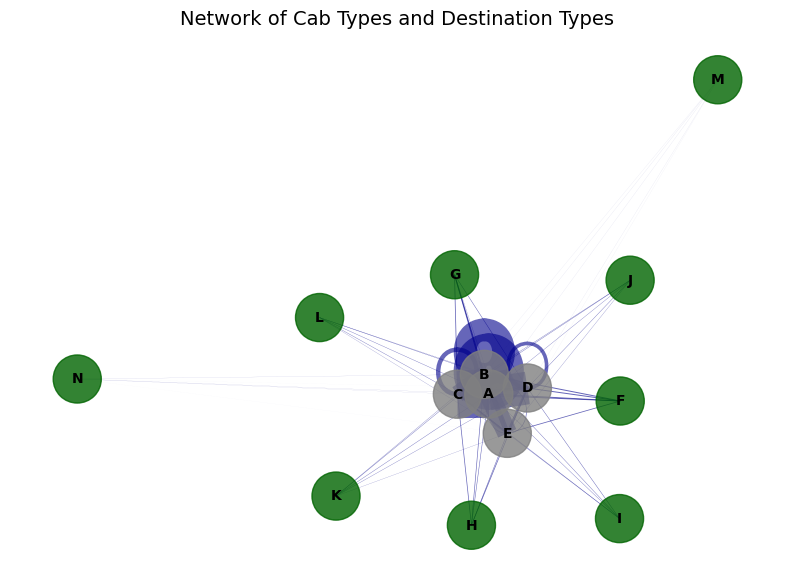

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/sigma_cabs.csv"  # Change if file is in another location
df = pd.read_csv(file_path)

# Drop rows with missing cab or destination info
df_graph = df.dropna(subset=["Type_of_Cab", "Destination_Type"])

# Initialize graph
G = nx.Graph()

# Get unique cab and destination types
cab_types = df_graph["Type_of_Cab"].unique()
dest_types = df_graph["Destination_Type"].unique()

# Add nodes with bipartite attribute
G.add_nodes_from(cab_types, bipartite="cab")
G.add_nodes_from(dest_types, bipartite="destination")

# Create weighted edges (count of trips)
edges = (
    df_graph.groupby(["Type_of_Cab", "Destination_Type"])
    .size()
    .reset_index(name="weight")
)

for _, row in edges.iterrows():
    G.add_edge(row["Type_of_Cab"], row["Destination_Type"], weight=row["weight"])

# Draw graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.7, seed=42)

# Node colors (cab = blue, destination = green)
node_colors = ["grey" if node in cab_types else "darkgreen" for node in G.nodes()]

# Draw nodes, edges, and labels with dark blue edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1200, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=[d["weight"] / 500 for _, _, d in G.edges(data=True)], edge_color="darkblue", alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Network of Cab Types and Destination Types", fontsize=14)
plt.axis("off")
plt.show()